In [1]:
#importing the important libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, r2_score
import joblib

In [3]:
#data collection/Loading the data
df=pd.read_csv("C:\PRACTICALS\SMART_HERBAL_DENTISTRY\_no. from 1 to 100 (1).csv")
df

<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\PRIYANSHU RAMI\AppData\Local\Temp\ipykernel_22812\88992113.py:2: SyntaxWarning: invalid escape sequence '\P'
  df=pd.read_csv("C:\PRACTICALS\SMART_HERBAL_DENTISTRY\_no. from 1 to 100 (1).csv")


,Patient_ID,group,age,gender,diabetic_status,oral_temp,salivary_ph,MMP8,IL1B,TNF,hemoglobin,albumin,bacterial_growth,inflammation_severity_score
0,1,Healthy,24,Female,Non-diabetic,36.9,7.45,42.3,2.1,3.8,14.2,4.3,3.1,12
1,2,Healthy,27,Male,Non-diabetic,37.1,7.52,38.7,1.9,4.1,13.8,4.4,3.0,10
2,3,Healthy,31,Female,Non-diabetic,36.8,7.40,45.1,2.3,3.9,14.0,4.2,3.2,14
3,4,Healthy,35,Male,Non-diabetic,37.0,7.38,40.5,2.0,3.7,13.9,4.1,3.3,11
4,5,Healthy,40,Male,Non-diabetic,37.2,7.50,41.8,2.2,4.0,14.1,4.3,3.1,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,116,Diabetic+Periodontitis,70,Male,T2DM,36.9,5.85,315.2,72.5,92.5,7.0,1.0,11.4,100
116,117,Diabetic+Periodontitis,74,Female,T2DM,37.0,5.83,320.0,75.0,95.0,6.8,0.9,11.6,100
117,118,Diabetic+Periodontitis,78,Male,T2DM,37.1,5.80,325.5,77.5,97.5,6.6,0.8,11.8,100
118,119,Diabetic+Periodontitis,82,Female,T2DM,37.0,5.78,330.0,80.0,100.0,6.4,0.7,12.0,100


Uni-Variate Analysis

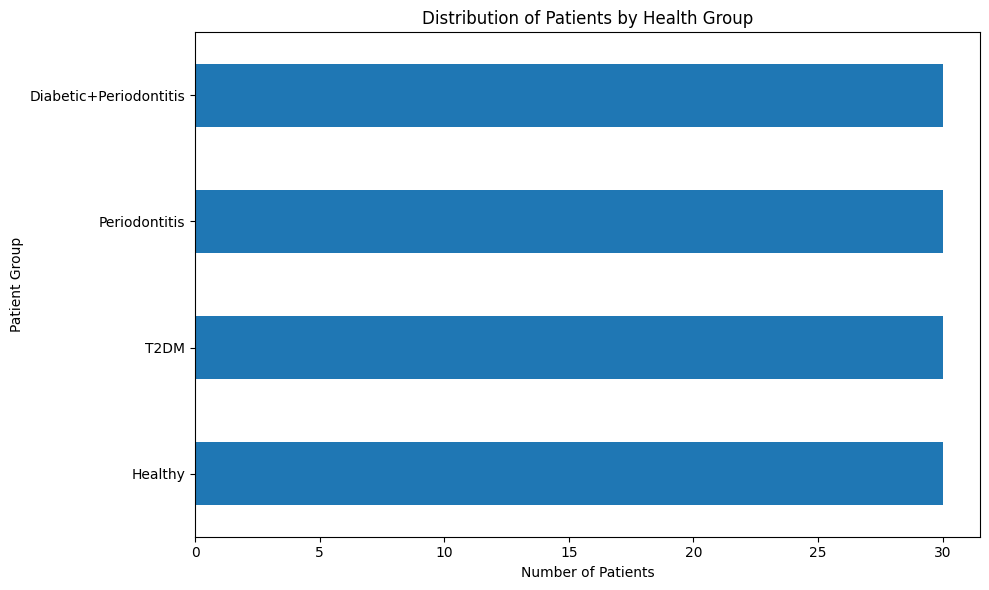

In [4]:
# Bar graph
plt.figure(figsize=(10, 6))

df['group'].value_counts().sort_values().plot(kind='barh')

plt.xlabel('Number of Patients')
plt.ylabel('Patient Group')
plt.title('Distribution of Patients by Health Group')

plt.tight_layout()

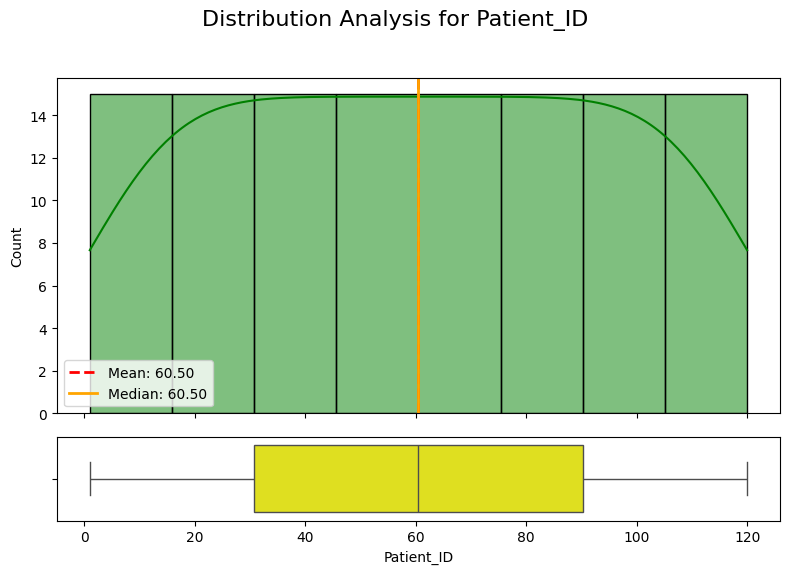

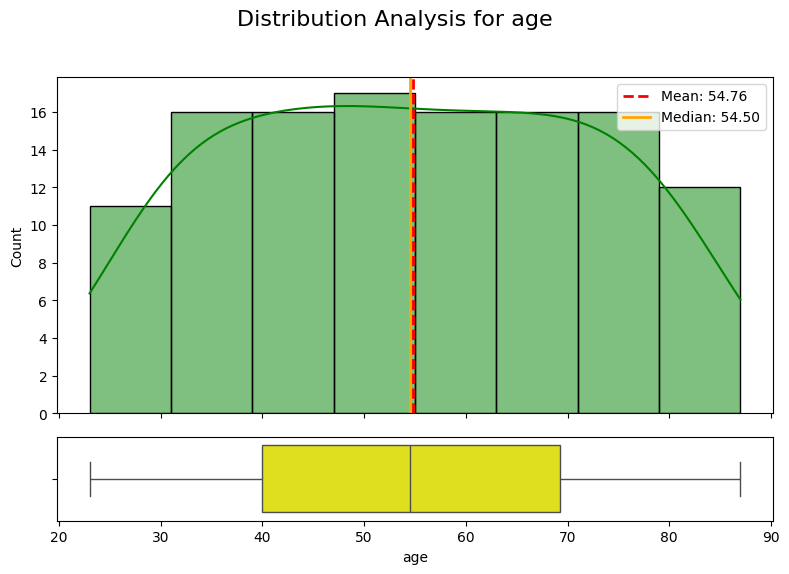

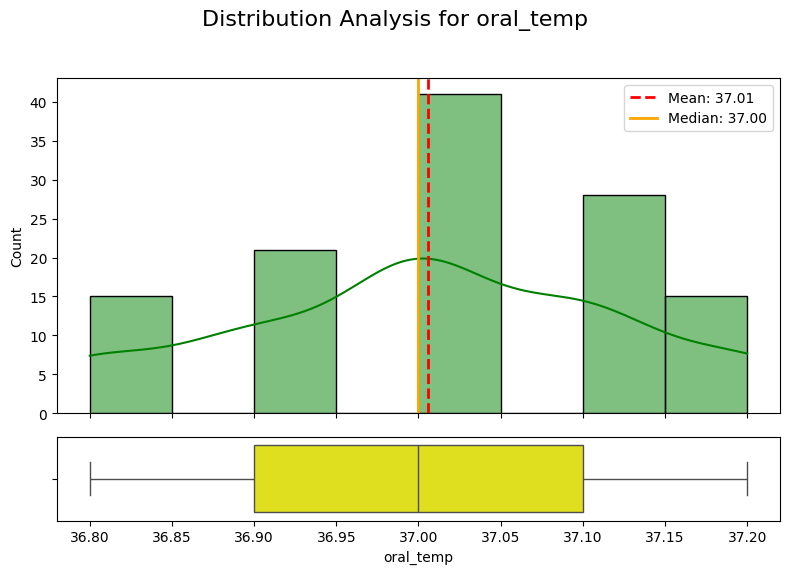

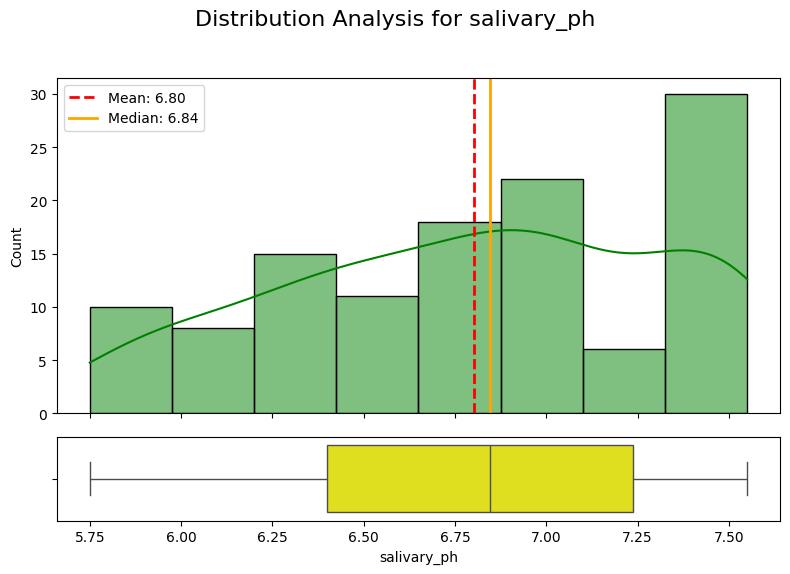

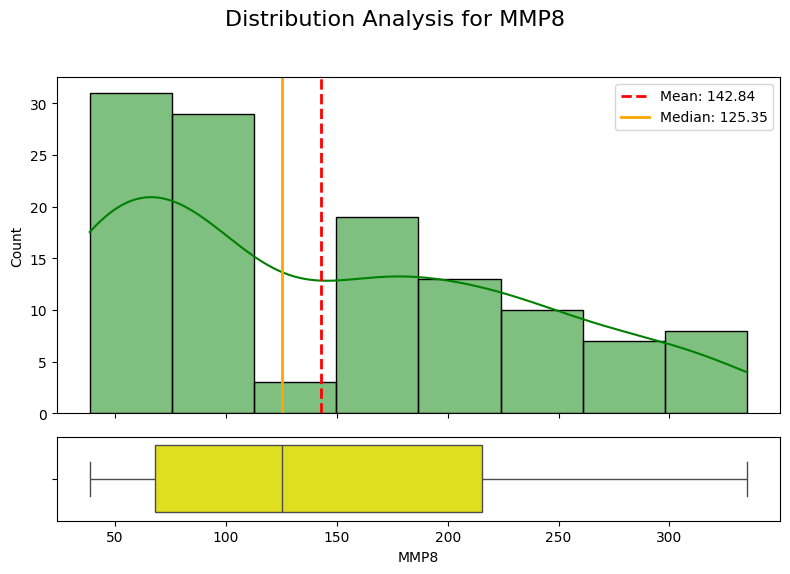

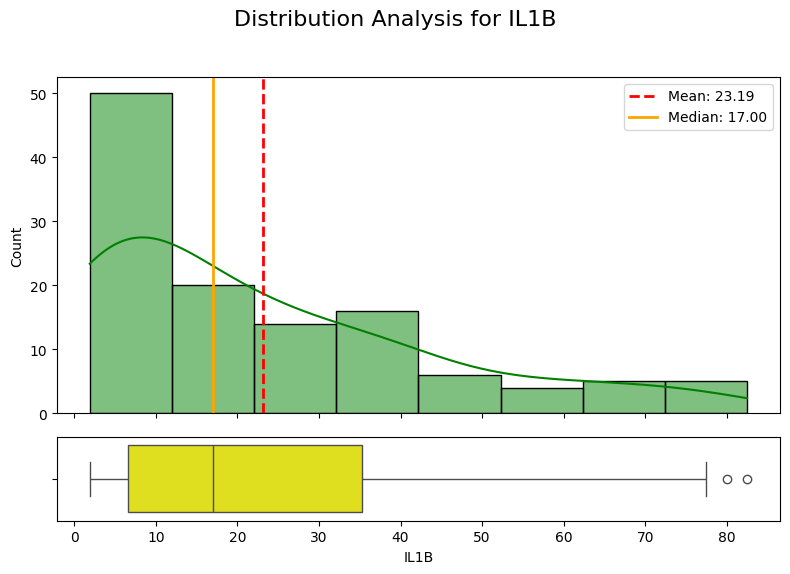

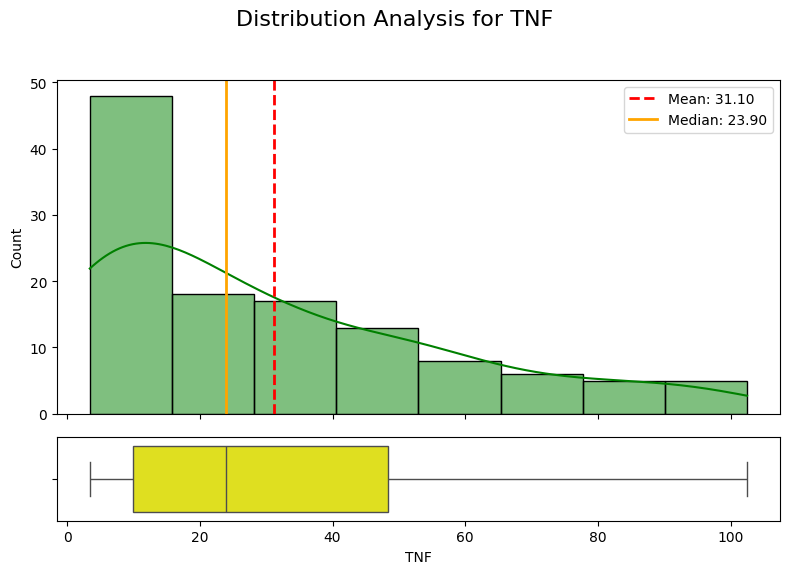

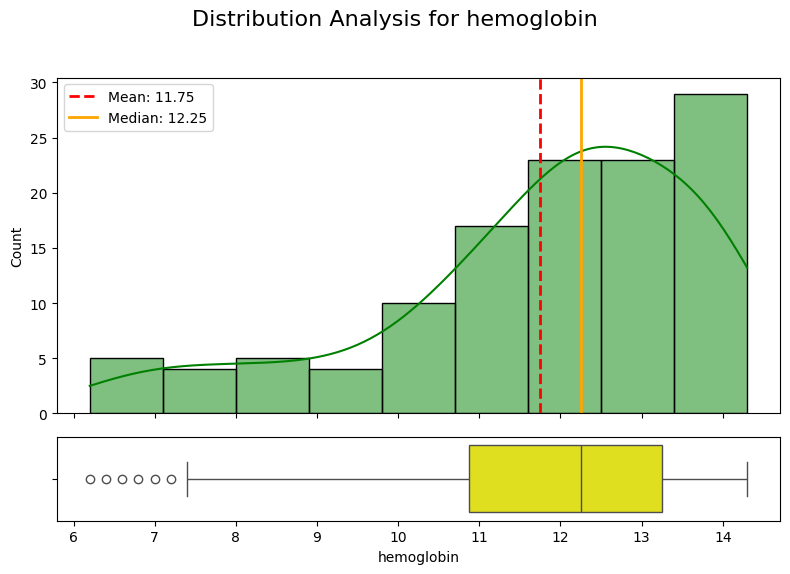

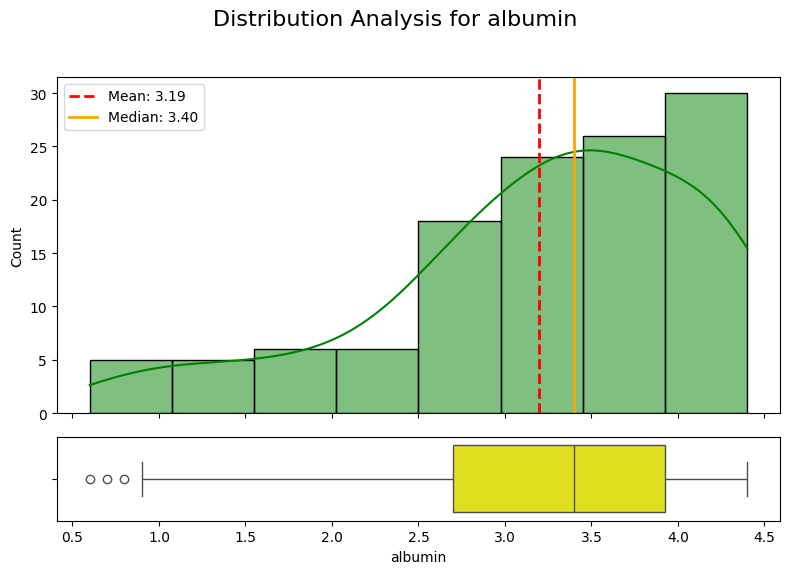

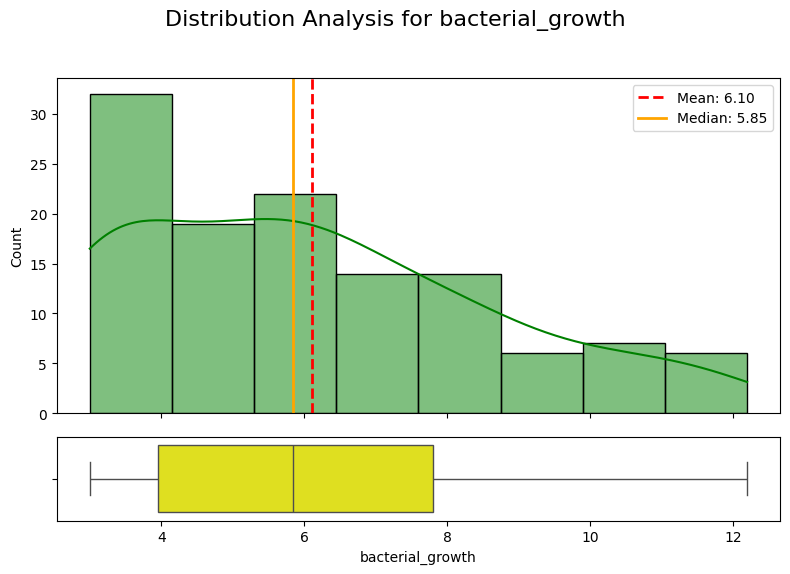

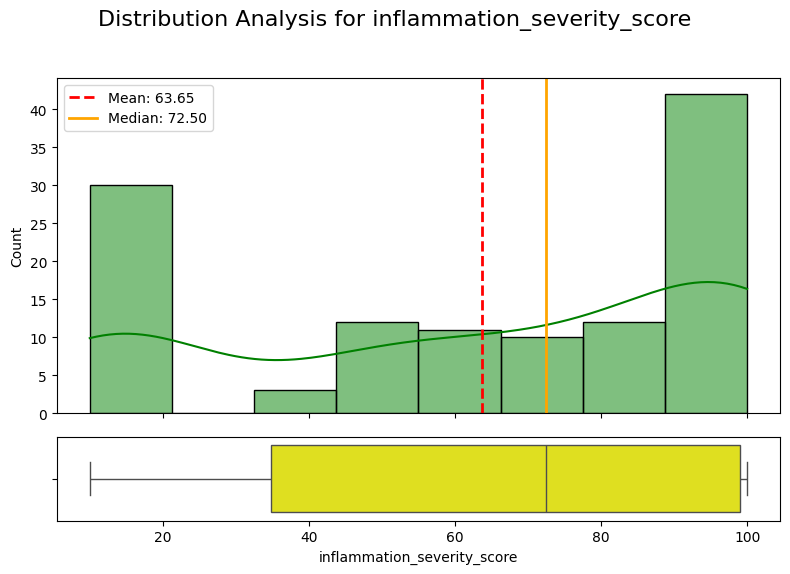

In [5]:
#Plotting Distribution plot and Boxplot for all the features to check for skewness
numerical_columns = df.select_dtypes(include=np.number).columns

for col in numerical_columns:
    fig, axes = plt.subplots(2, 1, figsize=(8, 6), sharex=True,
                             gridspec_kw={'height_ratios': (0.8, 0.2)})

    fig.suptitle(f'Distribution Analysis for {col}', fontsize=16)

    sns.histplot(data=df, x=col, kde=True, ax=axes[0], color='green')

    axes[0].axvline(df[col].mean(), color='red', linestyle='--', linewidth=2, label=f"Mean: {df[col].mean():.2f}")
    axes[0].axvline(df[col].median(), color='orange', linestyle='-', linewidth=2, label=f"Median: {df[col].median():.2f}")
    axes[0].legend()

    sns.boxplot(data=df, x=col, ax=axes[1], color='yellow')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    plt.show()

Multi-Variate Analysis

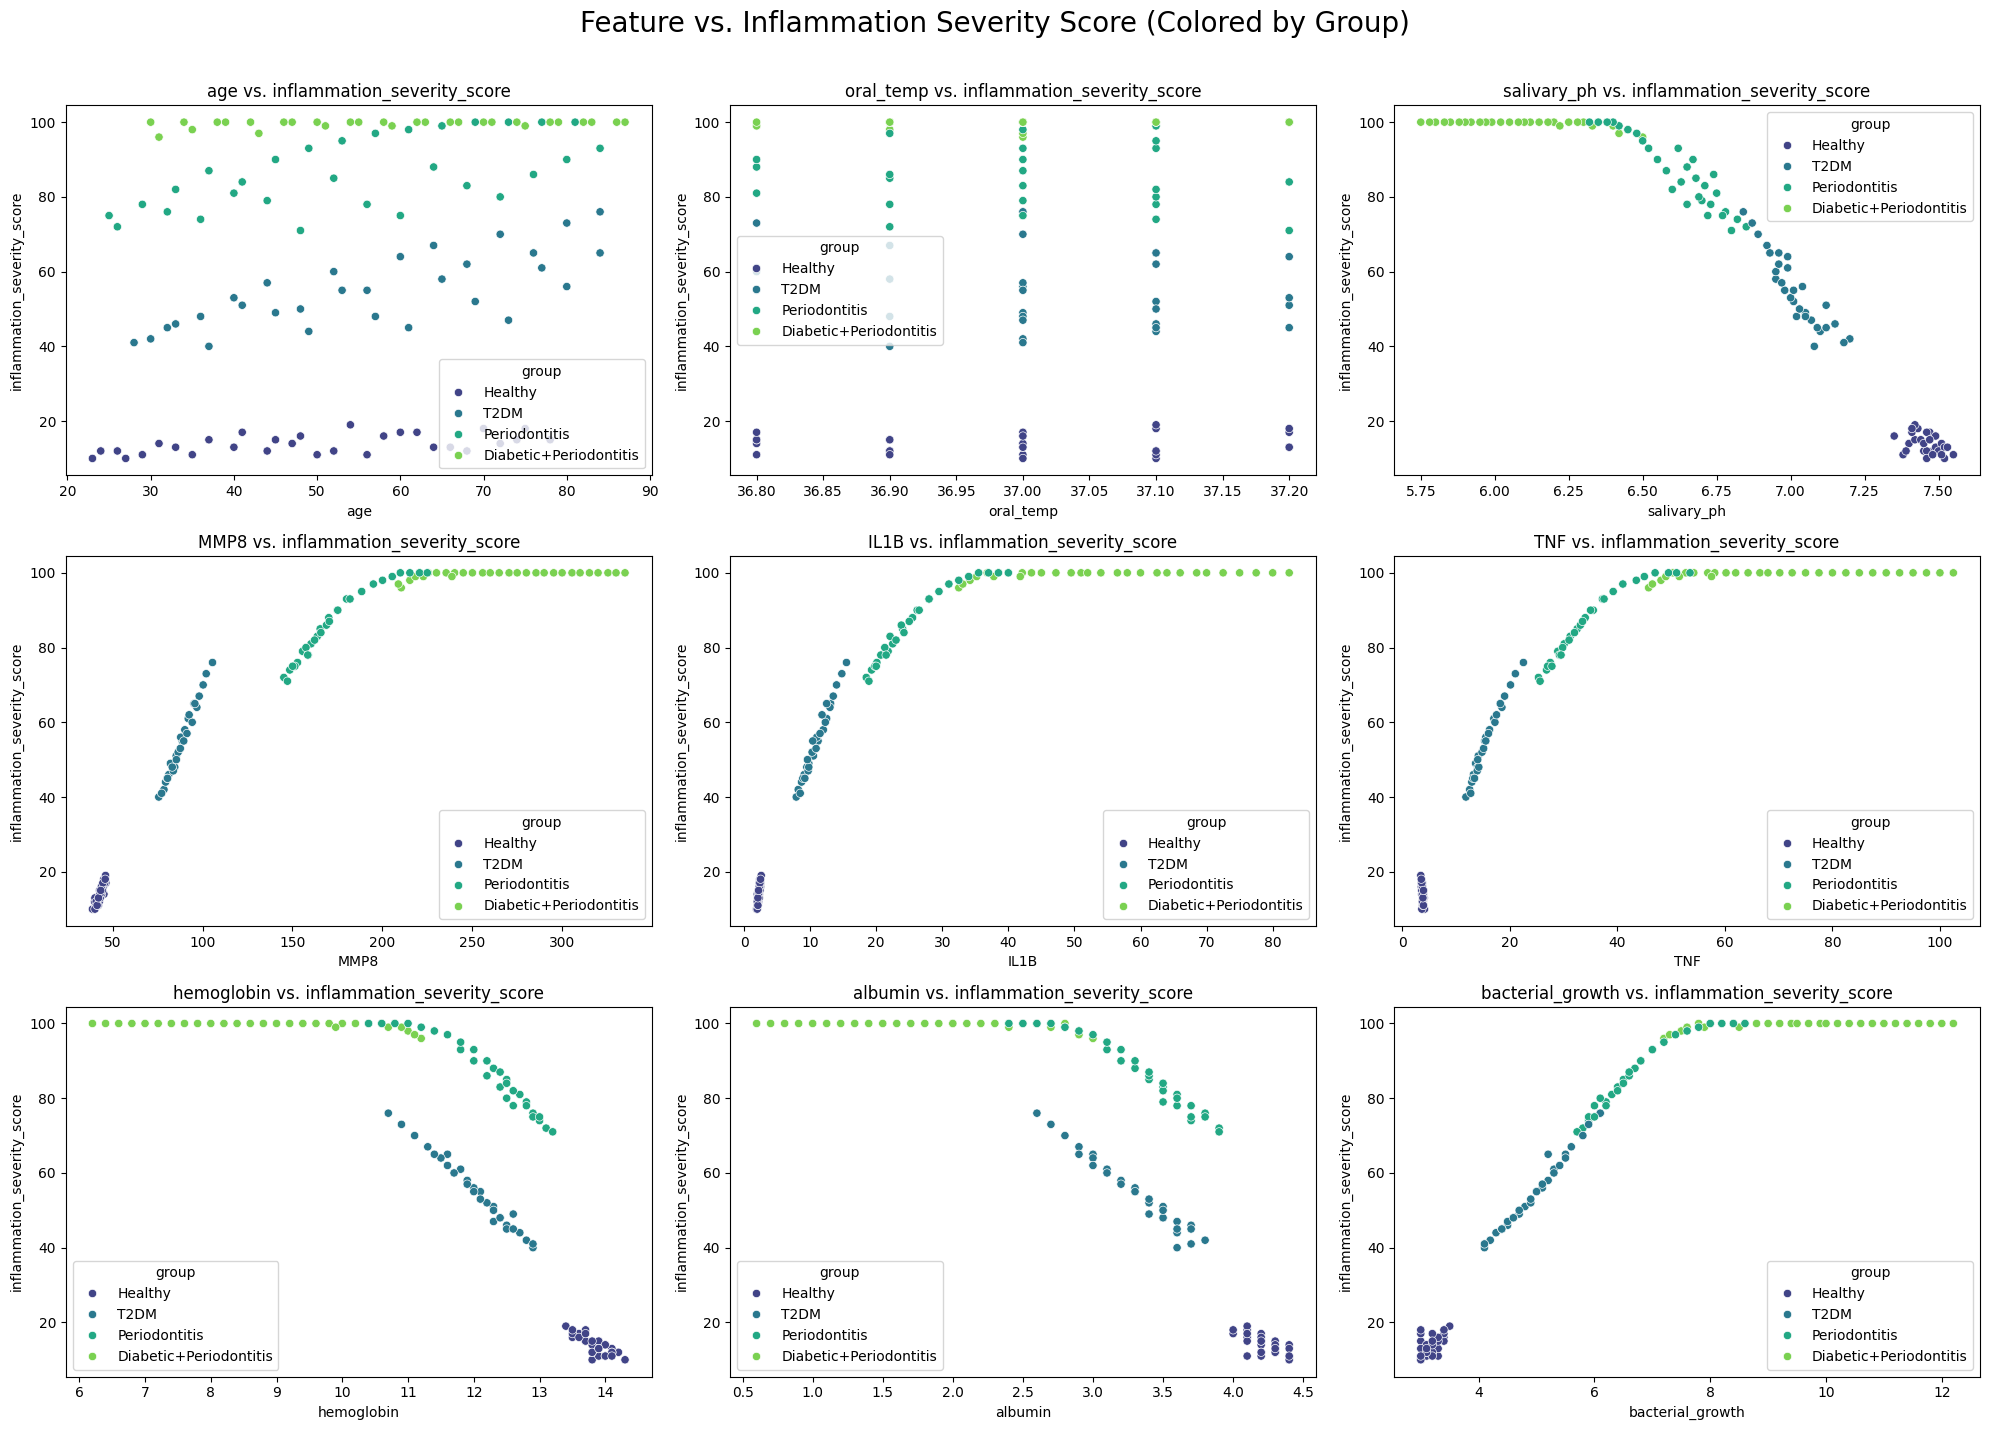

In [6]:
#Scatterplot
features_to_plot = ['age', 'oral_temp', 'salivary_ph', 'MMP8', 'IL1B', 'TNF', 'hemoglobin', 'albumin', 'bacterial_growth']
target_variable = 'inflammation_severity_score'

fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('Feature vs. Inflammation Severity Score (Colored by Group)', fontsize=20)

axes = axes.flatten()

for i, col in enumerate(features_to_plot):
    sns.scatterplot(data=df, x=col, y=target_variable, hue='group', ax=axes[i], palette='viridis')
    axes[i].set_title(f'{col} vs. {target_variable}')

for j in range(len(features_to_plot), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout(rect=[0, 0.03, 1, 0.97])

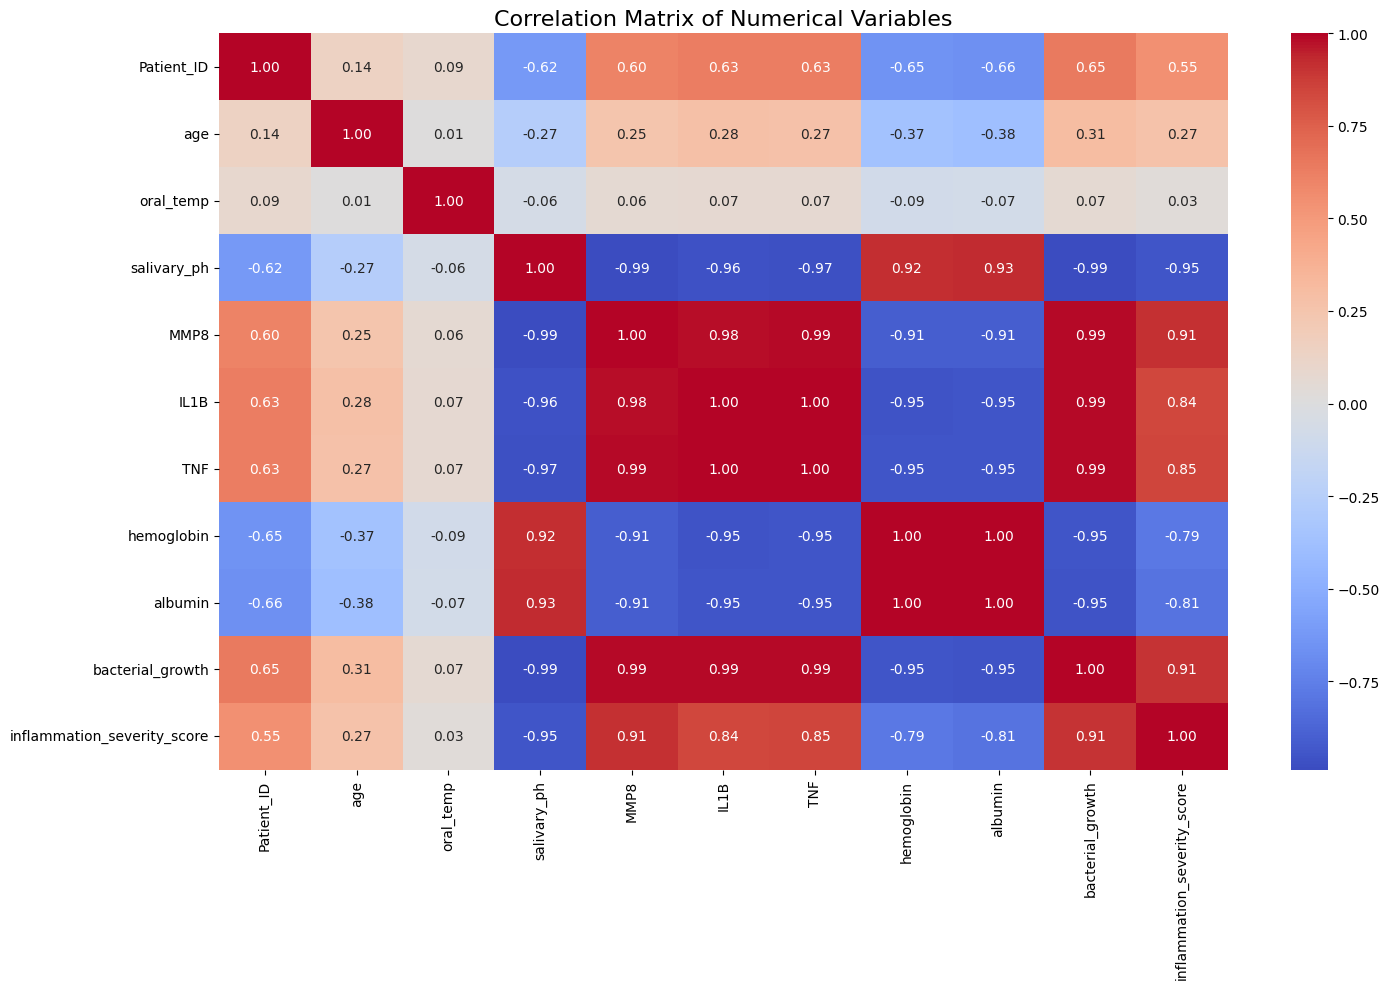

In [7]:
#heatmap
numerical_df = df.select_dtypes(include=np.number)
plt.figure(figsize=(15, 10))

sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Correlation Matrix of Numerical Variables', fontsize=16)

plt.tight_layout()


Average Biomarker values per group:
                              MMP8       IL1B        TNF
group                                                   
Diabetic+Periodontitis  266.006667  53.573333  69.973333
Healthy                  42.833333   2.220000   3.740000
Periodontitis           174.166667  25.956667  34.990000
T2DM                     88.350000  10.990000  15.700000


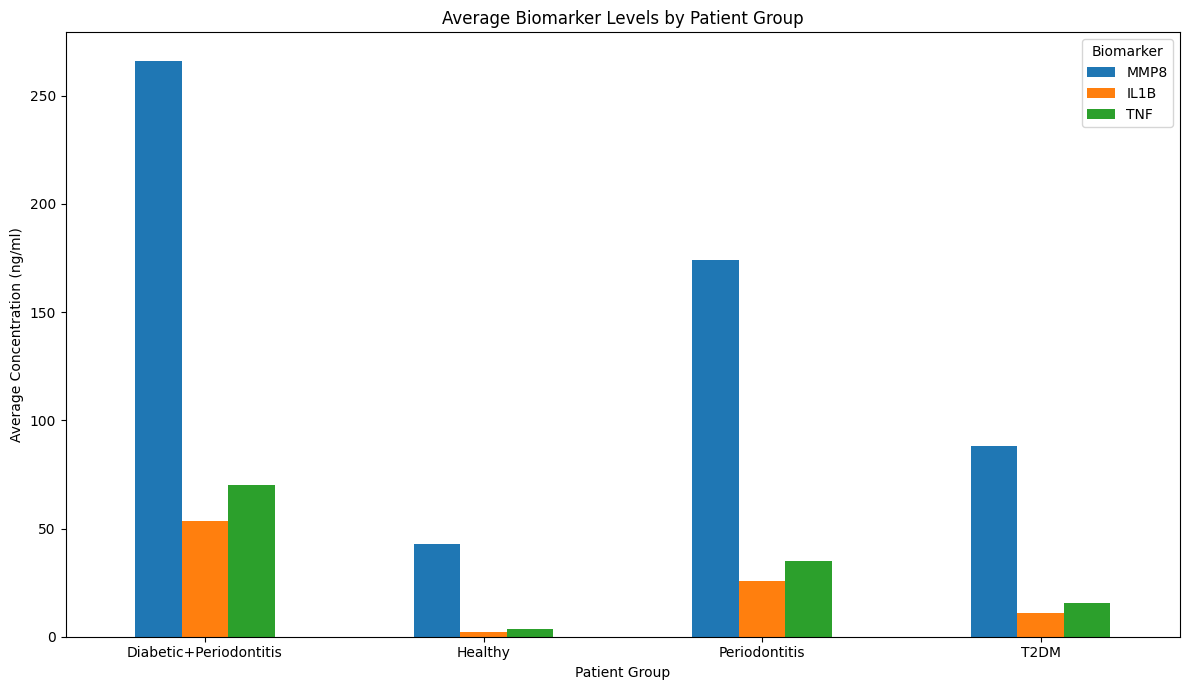

In [8]:
biomarker_means = df.groupby('group')[['MMP8', 'IL1B', 'TNF']].mean()

ax = biomarker_means.plot(kind='bar', figsize=(12, 7), rot=0, title='Average Biomarker Levels by Patient Group')

ax.set_ylabel('Average Concentration (ng/ml)')
ax.set_xlabel('Patient Group')
ax.legend(title='Biomarker')

plt.tight_layout()

print("\nAverage Biomarker values per group:")
print(biomarker_means)

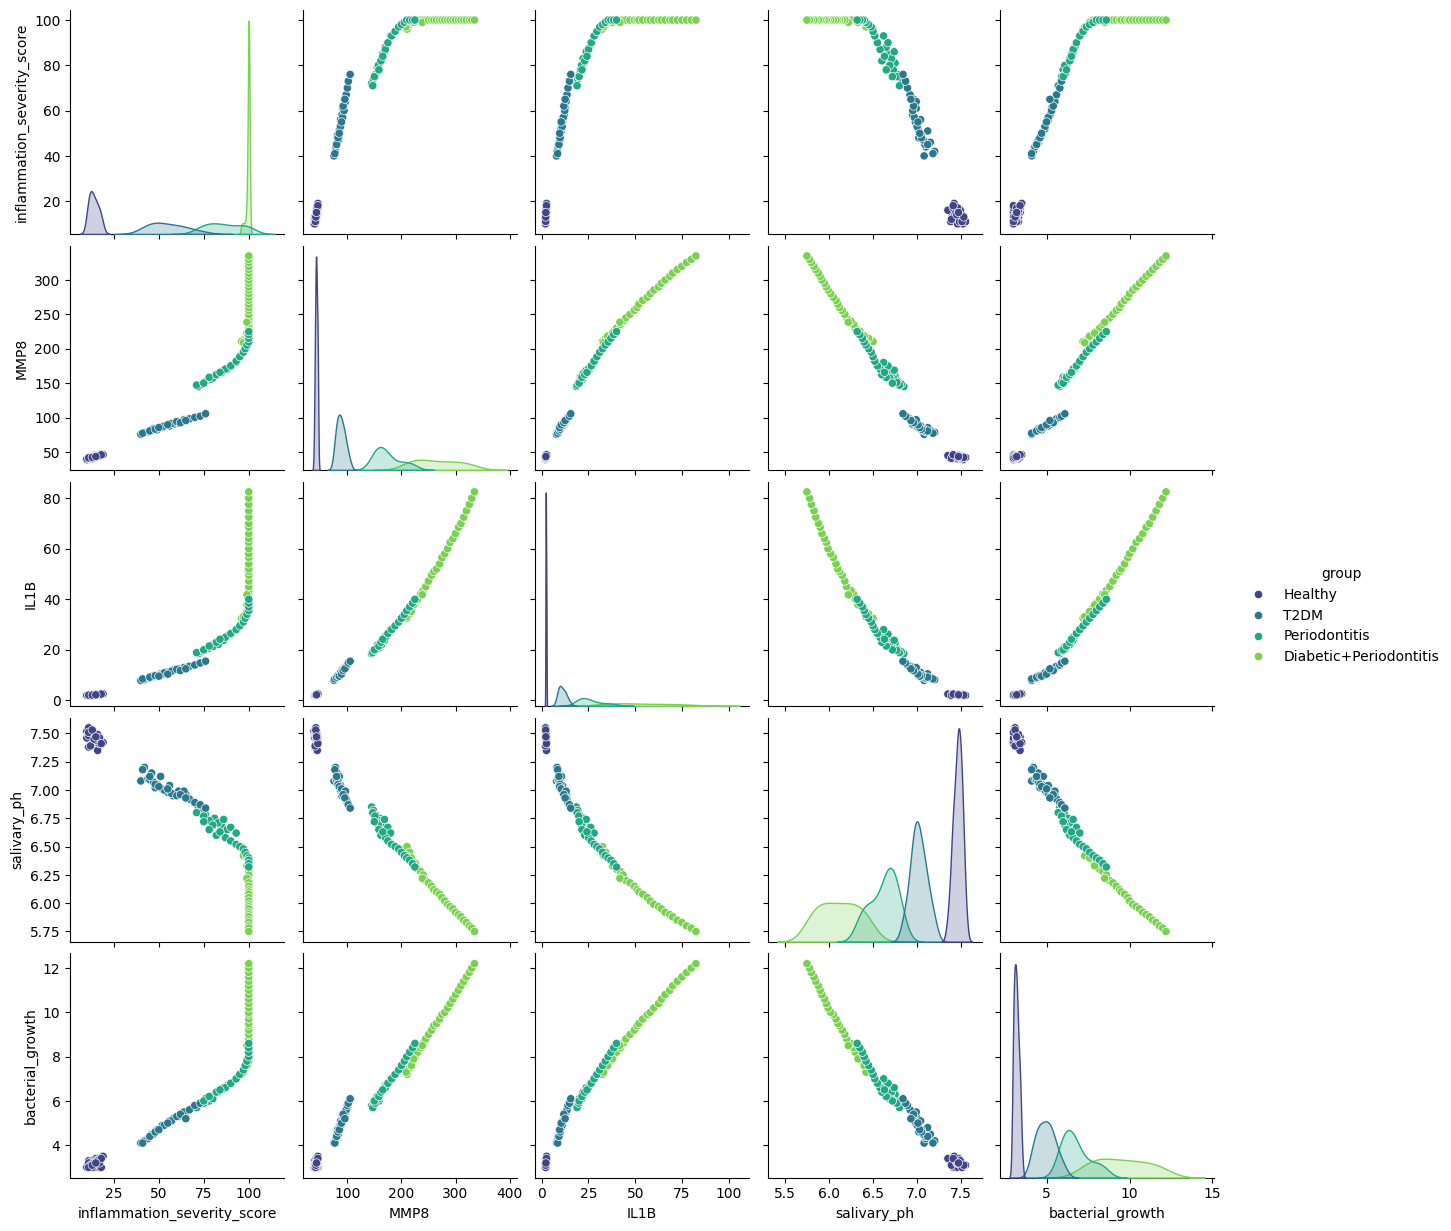

In [9]:
#pairplot
pairplot_vars = ['inflammation_severity_score', 'MMP8', 'IL1B', 'salivary_ph', 'bacterial_growth', 'group']
sns.pairplot(df[pairplot_vars], hue='group', palette='viridis')

C:\Users\PRIYANSHU RAMI\AppData\Local\Temp\ipykernel_22812\2725749546.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='group', y='MMP8', palette='pastel')


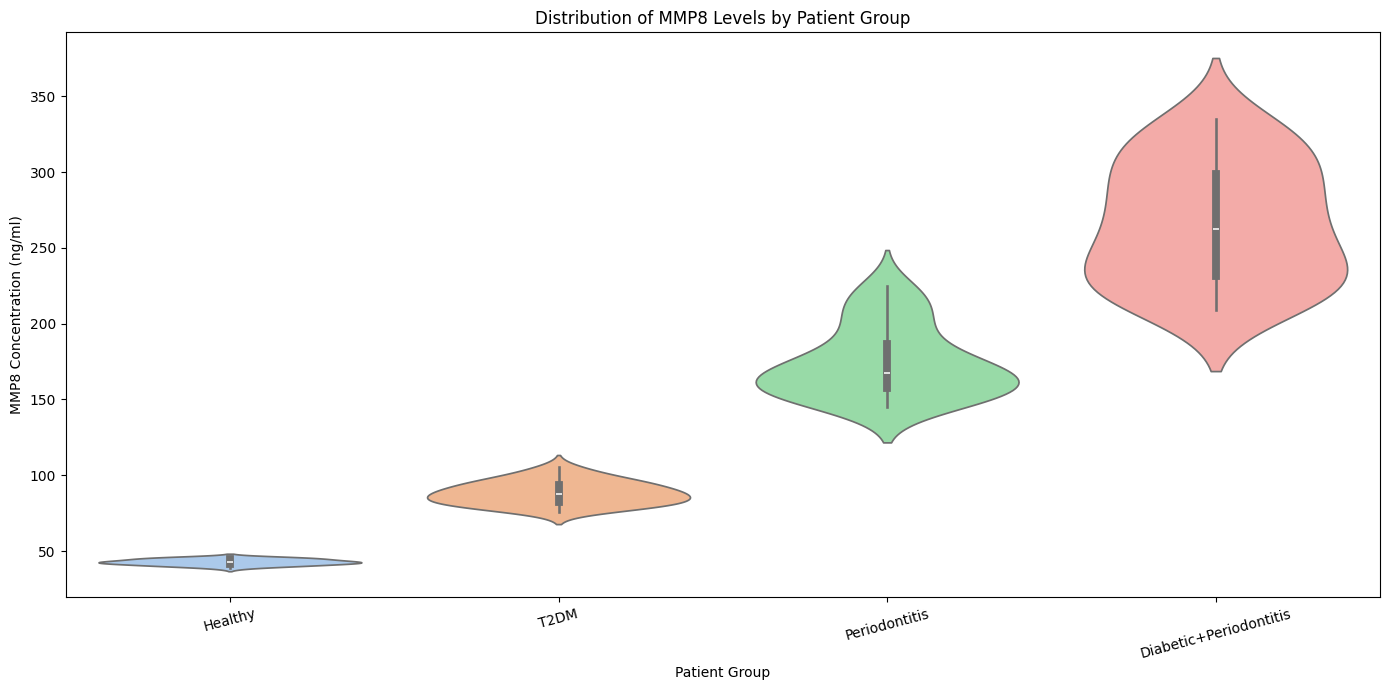

In [10]:
#Distribution Comparison
plt.figure(figsize=(14, 7))

sns.violinplot(data=df, x='group', y='MMP8', palette='pastel')

plt.title('Distribution of MMP8 Levels by Patient Group')
plt.xlabel('Patient Group')
plt.ylabel('MMP8 Concentration (ng/ml)')
plt.xticks(rotation=15)

plt.tight_layout()

In [11]:
#DEscriptive Analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Patient_ID                   120 non-null    int64  
 1   group                        120 non-null    object 
 2   age                          120 non-null    int64  
 3   gender                       120 non-null    object 
 4   diabetic_status              120 non-null    object 
 5   oral_temp                    120 non-null    float64
 6   salivary_ph                  120 non-null    float64
 7   MMP8                         120 non-null    float64
 8   IL1B                         120 non-null    float64
 9   TNF                          120 non-null    float64
 10  hemoglobin                   120 non-null    float64
 11  albumin                      120 non-null    float64
 12  bacterial_growth             120 non-null    float64
 13  inflammation_severit

In [12]:
df.describe()

,Patient_ID,age,oral_temp,salivary_ph,MMP8,IL1B,TNF,hemoglobin,albumin,bacterial_growth,inflammation_severity_score
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.0000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,60.500000,54.758333,37.005833,6.802083,142.839167,23.1850,31.100833,11.752500,3.194167,6.104167,63.650000
std,34.785054,17.505819,0.119027,0.518751,88.728347,21.2374,26.965139,1.995624,0.943202,2.519217,33.861966
min,1.000000,23.000000,36.800000,5.750000,38.700000,1.9000,3.400000,6.200000,0.600000,3.000000,10.000000
25%,30.750000,40.000000,36.900000,6.400000,68.250000,6.5750,9.875000,10.875000,2.700000,3.950000,34.750000
50%,60.500000,54.500000,37.000000,6.845000,125.350000,17.0000,23.900000,12.250000,3.400000,5.850000,72.500000
75%,90.250000,69.250000,37.100000,7.237500,215.300000,35.2750,48.325000,13.250000,3.925000,7.800000,99.000000
max,120.000000,87.000000,37.200000,7.550000,335.000000,82.5000,102.500000,14.300000,4.400000,12.200000,100.000000


In [13]:
df.isnull().sum()

Patient_ID                     0
group                          0
age                            0
gender                         0
diabetic_status                0
oral_temp                      0
salivary_ph                    0
MMP8                           0
IL1B                           0
TNF                            0
hemoglobin                     0
albumin                        0
bacterial_growth               0
inflammation_severity_score    0
dtype: int64

In [14]:
#Defining Input Features (X) and Output Targets (y)
X = df[['age', 'gender', 'diabetic_status', 'oral_temp', 'salivary_ph', 'IL1B', 'TNF', 'hemoglobin', 'albumin', 'bacterial_growth']]

# Separate the targets into classification and regression
y_class = df[['group']]
y_reg = df[['MMP8', 'inflammation_severity_score']]

print("Features (X) head:")
print(X.head())
print("\nClassification Target (y_class) head:")
print(y_class.head())
print("\nRegression Targets (y_reg) head:")
print(y_reg.head())

Features (X) head:
   age  gender diabetic_status  oral_temp  salivary_ph  IL1B  TNF  hemoglobin  \
0   24  Female    Non-diabetic       36.9         7.45   2.1  3.8        14.2   
1   27    Male    Non-diabetic       37.1         7.52   1.9  4.1        13.8   
2   31  Female    Non-diabetic       36.8         7.40   2.3  3.9        14.0   
3   35    Male    Non-diabetic       37.0         7.38   2.0  3.7        13.9   
4   40    Male    Non-diabetic       37.2         7.50   2.2  4.0        14.1   

   albumin  bacterial_growth  
0      4.3               3.1  
1      4.4               3.0  
2      4.2               3.2  
3      4.1               3.3  
4      4.3               3.1  

Classification Target (y_class) head:
     group
0  Healthy
1  Healthy
2  Healthy
3  Healthy
4  Healthy

Regression Targets (y_reg) head:
   MMP8  inflammation_severity_score
0  42.3                           12
1  38.7                           10
2  45.1                           14
3  40.5              

--- Generating Textual Outlier Report (Specific Values) ---

No outliers found in 'age'.

No outliers found in 'oral_temp'.

No outliers found in 'salivary_ph'.

No outliers found in 'MMP8'.

Outliers found in 'IL1B':
     Patient_ID                   group  age  gender diabetic_status  \
118         119  Diabetic+Periodontitis   82  Female            T2DM   
119         120  Diabetic+Periodontitis   86    Male            T2DM   

     oral_temp  salivary_ph   MMP8  IL1B    TNF  hemoglobin  albumin  \
118       37.0         5.78  330.0  80.0  100.0         6.4      0.7   
119       37.2         5.75  335.0  82.5  102.5         6.2      0.6   

     bacterial_growth  inflammation_severity_score  
118              12.0                          100  
119              12.2                          100  

No outliers found in 'TNF'.

Outliers found in 'hemoglobin':
     Patient_ID                   group  age  gender diabetic_status  \
114         115  Diabetic+Periodontitis   66  Female   

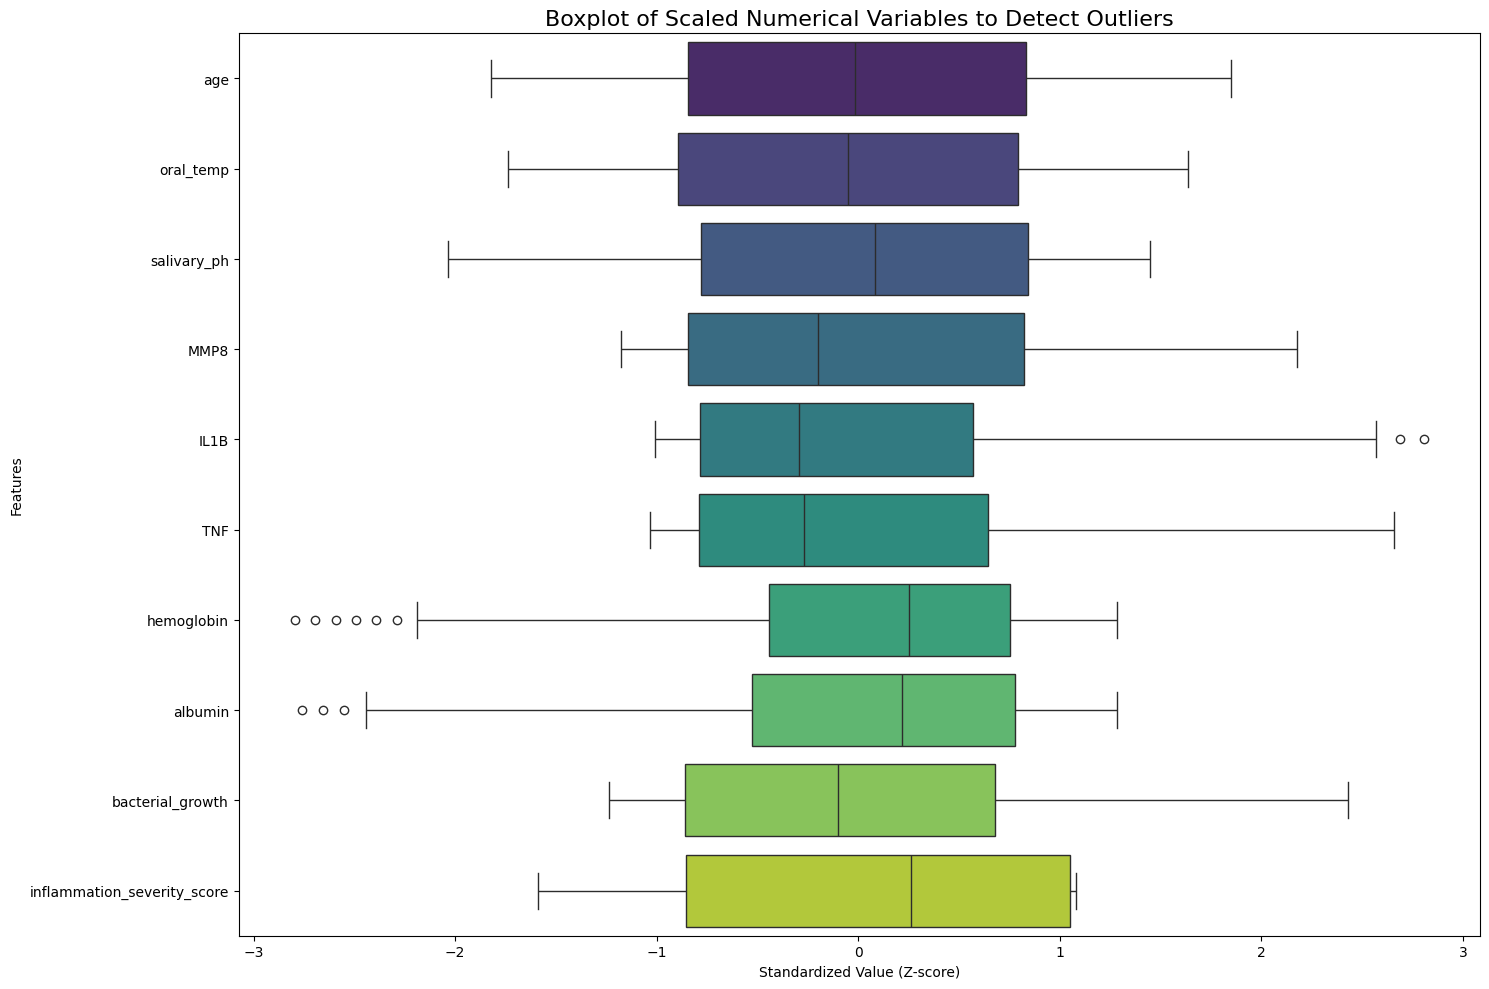

In [15]:
numerical_df_for_plot = df.select_dtypes(include=np.number).drop('Patient_ID', axis=1)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_df_for_plot)
scaled_df = pd.DataFrame(scaled_data, columns=numerical_df_for_plot.columns)

plt.figure(figsize=(15, 10))
sns.boxplot(data=scaled_df, orient='h', palette='viridis')
plt.title('Boxplot of Scaled Numerical Variables to Detect Outliers', fontsize=16)
plt.xlabel('Standardized Value (Z-score)')
plt.ylabel('Features')
plt.tight_layout()

print("--- Generating Textual Outlier Report (Specific Values) ---")

numerical_df_for_report = df.select_dtypes(include=np.number)

for col in numerical_df_for_report.columns.drop('Patient_ID'):
    Q1 = numerical_df_for_report[col].quantile(0.25)
    Q3 = numerical_df_for_report[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = numerical_df_for_report[(numerical_df_for_report[col] < lower_bound) | (numerical_df_for_report[col] > upper_bound)]

    if not outliers.empty:
        print(f"\nOutliers found in '{col}':")
        print(df.loc[outliers.index])
    else:
        print(f"\nNo outliers found in '{col}'.")


In [16]:
# Identifying categorical and numerical features
categorical_features = ['gender','diabetic_status']
numerical_features = ['age', 'oral_temp', 'salivary_ph', 'IL1B', 'TNF', 'hemoglobin', 'albumin', 'bacterial_growth']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

#Splitting the dataset into train and test parts
X_train, X_test, y_class_train, y_class_test, y_reg_train, y_reg_test = train_test_split(
    X, y_class, y_reg, test_size=0.2, random_state=42, stratify=y_class
)

In [17]:
le = LabelEncoder()
y_class_train_encoded = le.fit_transform(y_class_train.values.ravel())
y_class_test_encoded = le.transform(y_class_test.values.ravel())

In [18]:
#Training and building the classifier
clf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))])

print("Training the classification model...")
clf_pipeline.fit(X_train, y_class_train_encoded)
print("Classification model trained successfully.")

Training the classification model...
Classification model trained successfully.


C:\Users\PRIYANSHU RAMI\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [10:20:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [19]:
#Training and building the regressor
reg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', MultiOutputRegressor(XGBRegressor(objective='reg:squarederror', random_state=42)))])

# Train the regressor
print("\nTraining the regression model...")
reg_pipeline.fit(X_train, y_reg_train)
print("Regression model trained successfully.")


Training the regression model...
Regression model trained successfully.


In [20]:
# --- Evaluate the Classifier ---
print("\n--- Classification Model Evaluation ---")
y_class_pred_encoded = clf_pipeline.predict(X_test)
accuracy = accuracy_score(y_class_test_encoded, y_class_pred_encoded)
print(f"Accuracy: {accuracy:.4f}")

# To see the report with original labels
y_class_pred_labels = le.inverse_transform(y_class_pred_encoded)
y_class_test_labels = le.inverse_transform(y_class_test_encoded)
print("\nClassification Report:")
print(classification_report(y_class_test_labels, y_class_pred_labels))


# --- Evaluate the Regressor ---
print("\n--- Regression Model Evaluation ---")
y_reg_pred = reg_pipeline.predict(X_test)

# Calculate metrics for MMP8
mae_mmp8 = mean_absolute_error(y_reg_test['MMP8'], y_reg_pred[:, 0])
r2_mmp8 = r2_score(y_reg_test['MMP8'], y_reg_pred[:, 0])
print(f"MMP8 -> Mean Absolute Error (MAE): {mae_mmp8:.2f}")
print(f"MMP8 -> R-squared (R²): {r2_mmp8:.4f}")

# Calculate metrics for inflammation_severity_score
mae_score = mean_absolute_error(y_reg_test['inflammation_severity_score'], y_reg_pred[:, 1])
r2_score_val = r2_score(y_reg_test['inflammation_severity_score'], y_reg_pred[:, 1])
print(f"\nInflammation Score -> Mean Absolute Error (MAE): {mae_score:.2f}")
print(f"Inflammation Score -> R-squared (R²): {r2_score_val:.4f}")


--- Classification Model Evaluation ---
Accuracy: 1.0000

Classification Report:
                        precision    recall  f1-score   support

Diabetic+Periodontitis       1.00      1.00      1.00         6
               Healthy       1.00      1.00      1.00         6
         Periodontitis       1.00      1.00      1.00         6
                  T2DM       1.00      1.00      1.00         6

              accuracy                           1.00        24
             macro avg       1.00      1.00      1.00        24
          weighted avg       1.00      1.00      1.00        24


--- Regression Model Evaluation ---
MMP8 -> Mean Absolute Error (MAE): 4.29
MMP8 -> R-squared (R²): 0.9860

Inflammation Score -> Mean Absolute Error (MAE): 1.91
Inflammation Score -> R-squared (R²): 0.9944


In [21]:
joblib.dump(clf_pipeline, 'xgboost_classifier_pipeline.joblib')
joblib.dump(reg_pipeline, 'xgboost_regressor_pipeline.joblib')
joblib.dump(le, 'group_label_encoder.joblib')

print("\nModels and label encoder have been saved successfully.")
print("You can now load these files to make predictions on new data.")


Models and label encoder have been saved successfully.
You can now load these files to make predictions on new data.
